#### Input

In [35]:
%load_ext autoreload
%matplotlib inline
%load_ext nb_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [36]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers import plot_class
from helpers import helpfunction as helper

<IPython.core.display.Javascript object>

In [37]:
%autoreload

<IPython.core.display.Javascript object>

### Constants

In [38]:
run = 1
input_dir = "./input/23Nov/".format(run)
output_dir = "./output/run{}/".format(run)

<IPython.core.display.Javascript object>

In [39]:
data = pickle.load(open(input_dir + "after_training_run{}.pckl".format(run), "rb"))
samples = list(data.keys())

<IPython.core.display.Javascript object>

In [40]:
# Add the category cosmic:
for s in samples:
    if s not in helper.data_samples:
        cosmic = (data[s]["daughters"]["nu_purity_from_pfp"] < 0.5) & (
            data[s]["daughters"]["category"] != 5
        )
        data[s]["daughters"].loc[cosmic, "category"] = 4

<IPython.core.display.Javascript object>

In [41]:
nue_frame = data["nue"]["daughters"]
nue_mc = data["nue"]["mc"]

<IPython.core.display.Javascript object>

In [42]:
title_str = "MicroBooNE Run{}: {:.1e} POT".format(run, data["on"]["pot"])

<IPython.core.display.Javascript object>

In [43]:
list(nue_frame.keys())

['run',
 'sub',
 'evt',
 'topological_score',
 'n_pfps',
 'n_showers',
 'n_tracks',
 'reco_nu_vtx_sce_x',
 'reco_nu_vtx_sce_y',
 'reco_nu_vtx_sce_z',
 'reco_nu_vtx_x',
 'crtveto',
 'crthitpe',
 'slclustfrac',
 'hits_ratio',
 'nu_flashmatch_score',
 'selected',
 'category',
 'nslice',
 'CosmicIP',
 'n_tracks_contained',
 'contained_sps_ratio',
 'contained_fraction',
 'slpdg',
 'SliceCaloEnergy2',
 'NeutrinoEnergy2',
 'trk_score_v',
 'trk_distance_v',
 'trk_theta_v',
 'trk_phi_v',
 'trk_len_v',
 'trk_pid_chipr_v',
 'trk_pid_chimu_v',
 'trk_pid_chipr_v_v',
 'trk_pid_chimu_v_v',
 'trk_pid_chipr_u_v',
 'trk_pid_chimu_u_v',
 'trk_llr_pid_u_v',
 'trk_llr_pid_v_v',
 'trk_llr_pid_y_v',
 'trk_llr_pid_v',
 'trk_llr_pid_score_v',
 'trk_mcs_muon_mom_v',
 'trk_calo_energy_y_v',
 'trk_sce_end_x_v',
 'trk_sce_end_y_v',
 'trk_sce_end_z_v',
 'trk_sce_start_x_v',
 'trk_sce_start_y_v',
 'trk_sce_start_z_v',
 'shr_energy_y_v',
 'shr_openangle_v',
 'shr_tkfit_start_x_v',
 'shr_tkfit_start_y_v',
 'shr_tkfit_

<IPython.core.display.Javascript object>

In [44]:
plotter = plot_class.Plotter(data, signal="nue", genie_version="mcc9")

Initialisation completed!


<IPython.core.display.Javascript object>

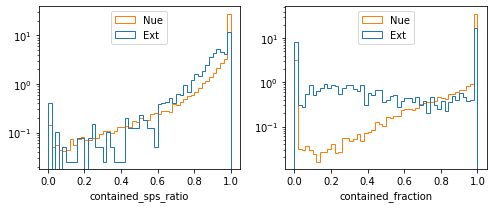

<IPython.core.display.Javascript object>

In [45]:
### PLOT the containment!
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(7, 3))

plot_data = [
    data["off"]["daughters"].query("e_candidate>0 & preselect")["contained_sps_ratio"],
    data["nue"]["daughters"].query("e_candidate>0 & preselect & nueccinc")[
        "contained_sps_ratio"
    ],
    data["off"]["daughters"].query("e_candidate>0 & preselect")["contained_fraction"],
    data["nue"]["daughters"].query("e_candidate>0 & preselect & nueccinc")[
        "contained_fraction"
    ],
]
ax[0].hist(plot_data[0:2], bins=50, density=True, label=["Ext", "Nue"], histtype="step")
ax[0].legend(loc="upper center")
ax[0].set_xlabel("contained_sps_ratio")
ax[0].set_yscale("log")

ax[1].hist(plot_data[2:4], bins=50, density=True, label=["Ext", "Nue"], histtype="step")
ax[1].legend(loc="upper center")
ax[1].set_xlabel("contained_fraction")
ax[1].set_yscale("log")

fig.tight_layout()

In [11]:
del data

<IPython.core.display.Javascript object>

### Evaluation

In [12]:
q_s = "(select & e_candidate)"

<IPython.core.display.Javascript object>

In [13]:
print(nue_frame.query("nslice>0")["true_category"].value_counts())
print()
print(nue_frame.query(q_s)["category"].value_counts())
print()
print(nue_frame.query(q_s)["interaction"].value_counts())

3    110733
2     90469
6     22863
1     15092
4        61
5        19
Name: true_category, dtype: int64

11    8965
1     4602
10    1658
5      189
4       94
Name: category, dtype: int64

0     7316
1     4946
10    1745
2     1464
3       37
Name: interaction, dtype: int64


<IPython.core.display.Javascript object>

In [14]:
print(pd.Series(nue_mc["category"]).value_counts())
print()
print(pd.Series(nue_mc["interaction"]).value_counts())
print()
print(pd.Series(nue_mc["true_category"]).value_counts())

11    28544
1     24335
0     18474
5     11509
10     6459
3         8
31        6
dtype: int64

0     34353
1     32732
2     12740
10     9196
3       314
dtype: int64

2    36688
3    30568
6    13452
1     8595
4       28
5        4
dtype: int64


<IPython.core.display.Javascript object>

### Plots

#### Signal sample plots

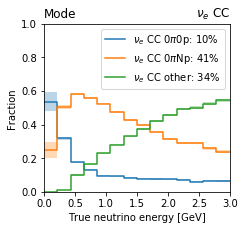

<IPython.core.display.Javascript object>

In [49]:
cats = {1: 10, 2: 11, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat, cat_d in cats.items():
    den = nue_mc[field]
    num = nue_mc[field][nue_mc["true_category"] == cat]

    den_w = nue_mc["weightSpline"]
    num_w = nue_mc["weightSpline"][nue_mc["true_category"] == cat]

    eff, unc_low, unc_up, edges = plot_class.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0}: {1:.0f}%".format(
            plotter.dicts.category_labels[cat_d], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Mode", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_int.pdf", bbox_inches="tight")

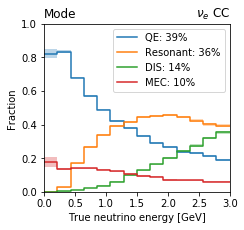

<IPython.core.display.Javascript object>

In [15]:
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15

fig, ax = plt.subplots(ncols=1, figsize=(3.5, 3.3))

for cat in cats:
    den = nue_mc[field]
    num = nue_mc[field][nue_mc["interaction"] == cat]

    den_w = nue_mc["weightSpline"]
    num_w = nue_mc["weightSpline"][nue_mc["interaction"] == cat]

    eff, unc_low, unc_up, edges = plot_class.efficiency_post(
        num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
    )
    ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
    ax.step(
        edges,
        eff,
        where="post",
        label="{0}: {1:.0f}%".format(
            plotter.dicts.int_labels[cat], sum(num_w) / sum(den_w) * 100
        ),
    )
ax.set_title(r"$\nu_e$ CC", loc="right")
ax.set_title("Mode", loc="left")
ax.set_xlabel("True neutrino energy [GeV]")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 1)
ax.set_xlim(x_min, x_max)
ax.legend(loc="upper right")

fig.tight_layout()

fig.savefig(output_dir + "truth_int.pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:380: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.13%
Purity: 2.09%
Purity: 38.20%


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:380: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.13%
Purity: 2.09%
Purity: 38.20%


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:380: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


Purity: 0.13%
Purity: 2.09%
Purity: 38.20%


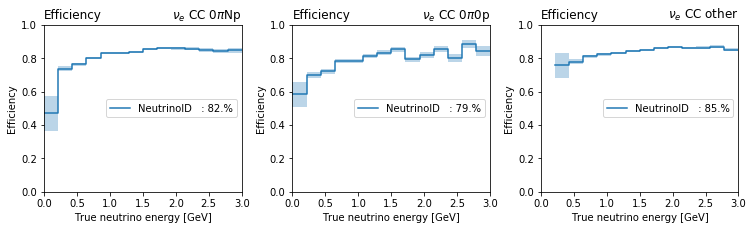

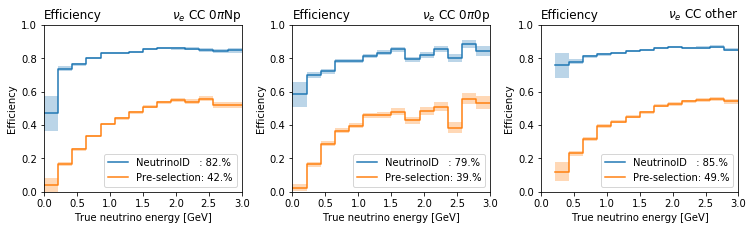

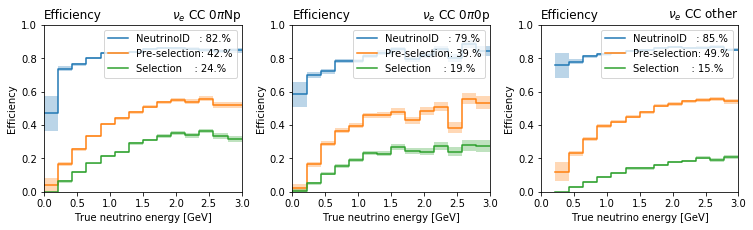

<IPython.core.display.Javascript object>

In [16]:
# eff per cat
cats = {2: 11, 1: 10, 3: 1}
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = ["daughter==0", "e_candidate & preselect", "e_candidate & select"]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]

for i in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(10.5, 3.3))

    for cat, ax in zip(cats.keys(), axes):
        for selector, lab in zip(selectors[: (i + 1)], labs):
            num = nue_frame.query(selector).query("true_category==@cat")[field]
            den = nue_mc[field][nue_mc["true_category"] == cat]

            num_w = nue_frame.query(selector).query("true_category==@cat")[
                "weightSpline"
            ]
            den_w = nue_mc["weightSpline"][nue_mc["true_category"] == cat]

            eff, unc_low, unc_up, edges = plot_class.efficiency_post(
                num,
                den,
                num_w=num_w,
                den_w=den_w,
                n_bins=n_bins,
                x_min=x_min,
                x_max=x_max,
            )
            ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
            ax.step(
                edges,
                eff,
                where="post",
                label="{0:<13}: {1:#.2g}%".format(lab, sum(num_w) / sum(den_w) * 100),
            )
        ax.set_title(plotter.dicts.category_labels[cats[cat]], loc="right")
        ax.set_title("Efficiency", loc="left")
        ax.set_xlabel("True neutrino energy [GeV]")
        ax.set_ylabel("Efficiency")
        ax.set_ylim(0, 1)
        ax.set_xlim(x_min, x_max)
        if i == 0:
            ax.legend(loc="center right")
        elif i == 1:
            ax.legend(loc="lower right")
        else:
            ax.legend(loc="upper right")

    fig.tight_layout()

    for selector in selectors:
        print(
            "Purity: {:.2f}%".format(100 * plotter.get_purity(selector, cats.values()))
        )
    fig.savefig(output_dir + "efficiency_cat_" + str(i) + ".pdf", bbox_inches="tight")

/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:380: RuntimeWarning: invalid value encountered in true_divide
  eff = num_w_h / den_w_h


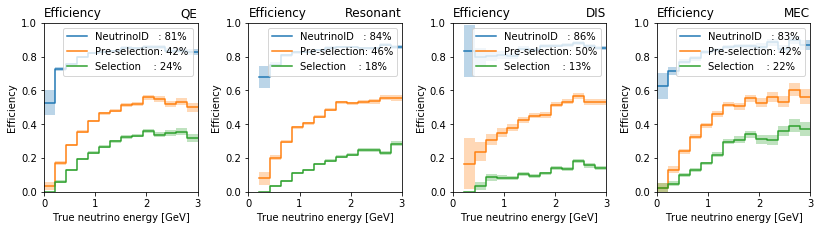

<IPython.core.display.Javascript object>

In [17]:
# eff per mode
cats = [0, 1, 2, 10]
field = "nu_e"
x_min = 0
x_max = 3
n_bins = 15
selectors = [
    "n_pfps>0 & daughter==0",
    "e_candidate & preselect",
    "e_candidate & select",
]  # q_s
labs = ["NeutrinoID", "Pre-selection", "Selection"]
fig, axes = plt.subplots(ncols=4, figsize=(11.5, 3.3))

for cat, ax in zip(cats, axes):
    for selector, lab in zip(selectors, labs):
        num = nue_frame.query(selector).query("interaction==@cat & nueccinc")[field]
        den = nue_mc[field][(nue_mc["interaction"] == cat) & nue_mc["nueccinc"] == 1]

        num_w = nue_frame.query(selector).query("interaction==@cat & nueccinc")[
            "weightSpline"
        ]
        den_w = nue_mc["weightSpline"][
            (nue_mc["interaction"] == cat) & nue_mc["nueccinc"] == 1
        ]

        eff, unc_low, unc_up, edges = plot_class.efficiency_post(
            num, den, num_w=num_w, den_w=den_w, n_bins=n_bins, x_min=x_min, x_max=x_max
        )
        ax.fill_between(edges, eff - unc_low, eff + unc_up, alpha=0.3, step="post")
        ax.step(
            edges,
            eff,
            where="post",
            label="{0:<13}: {1:.0f}%".format(lab, sum(num_w) / sum(den_w) * 100),
        )
    ax.set_title(plotter.dicts.int_labels[cat], loc="right")
    ax.set_title("Efficiency", loc="left")
    ax.set_xlabel("True neutrino energy [GeV]")
    ax.set_ylabel("Efficiency")
    ax.set_ylim(0, 1)
    ax.set_xlim(x_min, x_max)
    ax.legend(loc="upper right")

fig.tight_layout()
fig.savefig(output_dir + "efficiency_int.pdf", bbox_inches="tight")

#### Data/MC comparison

MC category: $\nu_e$ CC other: 3.3 	#entries 4664
MC category: $\nu_e$ CC 0$\pi$0p: 1.2 	#entries 1677
MC category: $\nu_e$ CC 0$\pi$Np: 6.4 	#entries 9090
MC category: $\nu_{\mu}$ CC other: 1.2 	#entries 21
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 2.3 	#entries 41
MC category: $\nu$ NC: 0.7 	#entries 13
MC category: $\nu$ NC $\pi^{0}$: 2.6 	#entries 47
MC category: Cosmic: 1.5 	#entries 119
MC category: Out of FV: 1.7 	#entries 219
MC category: Out of Cryo: 0.6 	#entries 5


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


CPU times: user 2.29 s, sys: 35.7 ms, total: 2.33 s
Wall time: 1.58 s


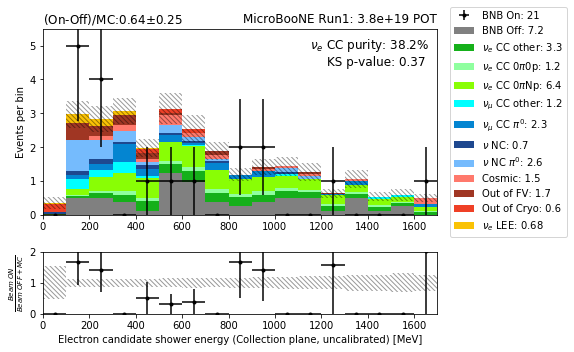

<IPython.core.display.Javascript object>

In [18]:
%%time
%autoreload
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(5 * plotter.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_energy_y_v",
    "Electron candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=17,
    x_min=0,
    x_max=1700,
    query=q_s,
    legend=True,
    title_str=title_str,
    kind="cat",
    y_max_scaler=1.1
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

#ax[0].set_ylim(0, 0.3)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_energy_y.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 3.3 	#entries 4664
MC category: $\nu_e$ CC 0$\pi$0p: 1.2 	#entries 1677
MC category: $\nu_e$ CC 0$\pi$Np: 6.4 	#entries 9090
MC category: $\nu_{\mu}$ CC other: 1.2 	#entries 21
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 2.3 	#entries 41
MC category: $\nu$ NC: 0.7 	#entries 13
MC category: $\nu$ NC $\pi^{0}$: 2.6 	#entries 47
MC category: Cosmic: 1.5 	#entries 119
MC category: Out of FV: 1.7 	#entries 219
MC category: Out of Cryo: 0.6 	#entries 5


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


CPU times: user 2.62 s, sys: 39.5 ms, total: 2.66 s
Wall time: 2.02 s


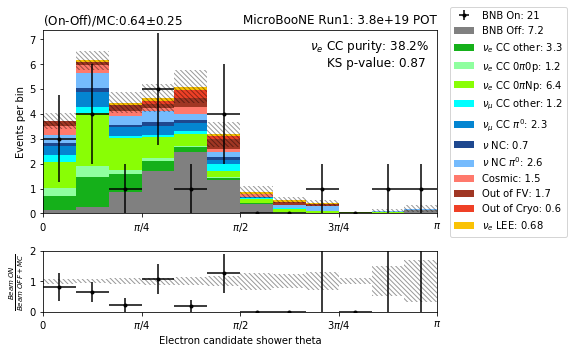

<IPython.core.display.Javascript object>

In [19]:
%%time
fig, ax = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(5 * plotter.gr, 5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_tkfit_theta_v",
    "Electron candidate shower theta",
    N_bins=12,
    x_min=0,
    x_max=np.pi,
    query=q_s,
    legend=True,
    title_str=title_str,
    kind="cat",
    y_max_scaler=1.2
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(x_labels)
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(x_labels)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/nue_shower_theta.pdf", bbox_inches="tight")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:286: RuntimeWarning: invalid value encountered in double_scalars
  sc_err = e / v
/home/wouter/Documents/Jupyt

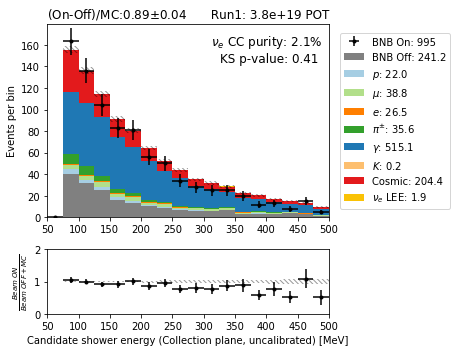

<IPython.core.display.Javascript object>

In [20]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_energy_y_v",
    "Candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=18,
    x_min=50,
    x_max=500,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.1,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_E_pdg.pdf", bbox_inches="tight")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
MC category: $\nu_e$ CC other: 9.7 	#entries 13579
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 3239
MC category: $\nu_e$ CC 0$\pi$Np: 10.7 	#entries 15002
MC category: $\nu_{\mu}$ CC other: 149.1 	#entries 2701
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 330.9 	#entries 6014
MC category: $\nu$ NC: 20.5 	#entries 372
MC category: $\nu$ NC $\pi^{0}$: 128.0 	#entries 2326
MC category: Cosmic: 78.3 	#entries 2517
MC category: Out of FV: 97.0 	#entries 3812
MC category: Out of Cryo: 16.0 	#entries 133


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:286: RuntimeWarning: invalid value encountered in double_scalars
  sc_err = e / v
/home/wouter/Documents/Jupyt

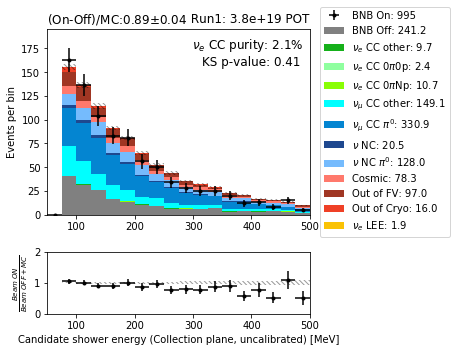

<IPython.core.display.Javascript object>

In [21]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "shr_energy_y_v",
    "Candidate shower energy (Collection plane, uncalibrated) [MeV]",
    N_bins=18,
    x_min=50,
    x_max=500,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.98,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)
fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shower_E.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 9.7 	#entries 13579
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 3239
MC category: $\nu_e$ CC 0$\pi$Np: 10.7 	#entries 15002
MC category: $\nu_{\mu}$ CC other: 149.1 	#entries 2701
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 330.9 	#entries 6014
MC category: $\nu$ NC: 20.5 	#entries 372
MC category: $\nu$ NC $\pi^{0}$: 128.0 	#entries 2326
MC category: Cosmic: 78.3 	#entries 2517
MC category: Out of FV: 97.0 	#entries 3812
MC category: Out of Cryo: 16.0 	#entries 133


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 9.7 	#entries 13579
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 3239
MC category: $\nu_e$ CC 0$\pi$Np: 10.7 	#entries 15002
MC category: $\nu_{\mu}$ CC other: 149.1 	#entries 2701
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 330.9 	#entries 6014
MC category: $\nu$ NC: 20.5 	#entries 372
MC category: $\nu$ NC $\pi^{0}$: 128.0 	#entries 2326
MC category: Cosmic: 78.3 	#entries 2517
MC category: Out of FV: 97.0 	#entries 3812
MC category: Out of Cryo: 16.0 	#entries 133
MC category: $\nu_e$ CC other: 9.7 	#entries 13579
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 3239
MC category: $\nu_e$ CC 0$\pi$Np: 10.7 	#entries 15002
MC category: $\nu_{\mu}$ CC other: 149.1 	#entries 2701
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 330.9 	#entries 6014
MC category: $\nu$ NC: 20.5 	#entries 372
MC category: $\nu$ NC $\pi^{0}$: 128.0 	#entries 2326
MC category: Cosmic: 78.3 	#entries 2517
MC category: Out of FV: 97.0 	#entries 3812
MC category: Out of Cryo: 16.0 	#entries 13

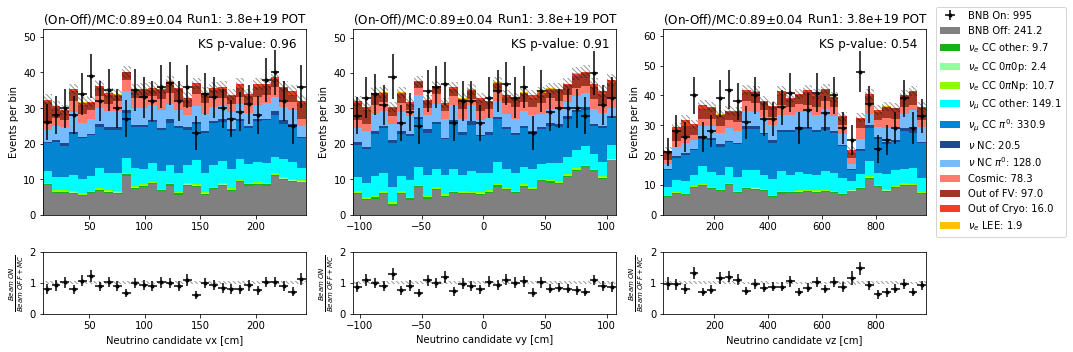

<IPython.core.display.Javascript object>

In [22]:
fig, ax = plt.subplots(
    ncols=3, nrows=2, figsize=(15, 5), gridspec_kw={"height_ratios": [3, 1]}
)


field_arr = ["reco_nu_vtx_sce_x", "reco_nu_vtx_sce_y", "reco_nu_vtx_sce_z"]
lab_arr = [
    "Neutrino candidate vx [cm]",
    "Neutrino candidate vy [cm]",
    "Neutrino candidate vz [cm]",
]
x_min_arr = helper.lower + np.array([10, 10, 10])
x_max_arr = helper.upper - np.array([10, 10, 50])

for i, (x_min, x_max, lab, field) in enumerate(
    zip(x_min_arr, x_max_arr, lab_arr, field_arr)
):
    ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
        ax.T[i],
        field,
        lab,
        N_bins=30,
        x_min=x_min,
        x_max=x_max,
        query="e_candidate>0 & preselect",
        legend=(i == 2),
        title_str=title_str.split("NE")[-1],
        kind="cat",
        y_max_scaler=1.3,
    )
    ax[0][i].text(
        ax[0][i].get_xlim()[1] * 0.98,
        ax[0][i].get_ylim()[1] * 0.9,
        "KS p-value: {0:<5.2f}".format(ks_p),
        horizontalalignment="right",
        fontsize=12,
    )

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_vtx.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 9.7 	#entries 13579
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 3239
MC category: $\nu_e$ CC 0$\pi$Np: 10.7 	#entries 15002
MC category: $\nu_{\mu}$ CC other: 149.1 	#entries 2701
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 330.9 	#entries 6014
MC category: $\nu$ NC: 20.5 	#entries 372
MC category: $\nu$ NC $\pi^{0}$: 128.0 	#entries 2326
MC category: Cosmic: 78.3 	#entries 2517
MC category: Out of FV: 97.0 	#entries 3812
MC category: Out of Cryo: 16.0 	#entries 133


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 9.7 	#entries 13579
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 3239
MC category: $\nu_e$ CC 0$\pi$Np: 10.7 	#entries 15002
MC category: $\nu_{\mu}$ CC other: 149.1 	#entries 2701
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 330.9 	#entries 6014
MC category: $\nu$ NC: 20.5 	#entries 372
MC category: $\nu$ NC $\pi^{0}$: 128.0 	#entries 2326
MC category: Cosmic: 78.3 	#entries 2517
MC category: Out of FV: 97.0 	#entries 3812
MC category: Out of Cryo: 16.0 	#entries 133


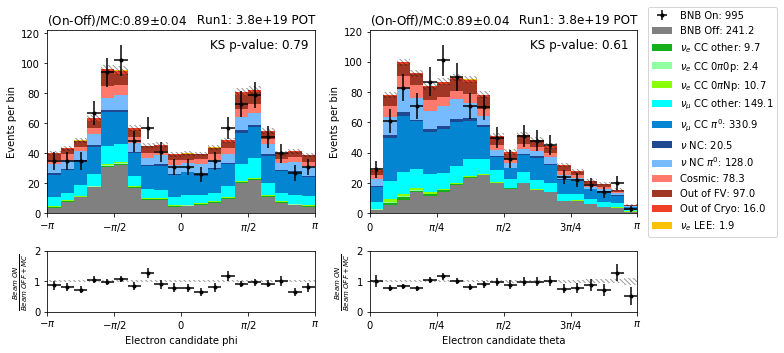

<IPython.core.display.Javascript object>

In [23]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_tkfit_phi_v",
    "Electron candidate phi",
    N_bins=20,
    x_min=-np.pi,
    x_max=np.pi,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)
x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_xticklabels(x_labels)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_xticklabels(x_labels)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_theta_v",
    "Electron candidate theta",
    N_bins=20,
    x_min=0,
    x_max=np.pi,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)
x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1][1].set_xticks(x_ticks)
ax[1][1].set_xticklabels(x_labels)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_xticklabels(x_labels)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_angles.pdf", bbox_inches="tight")

MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


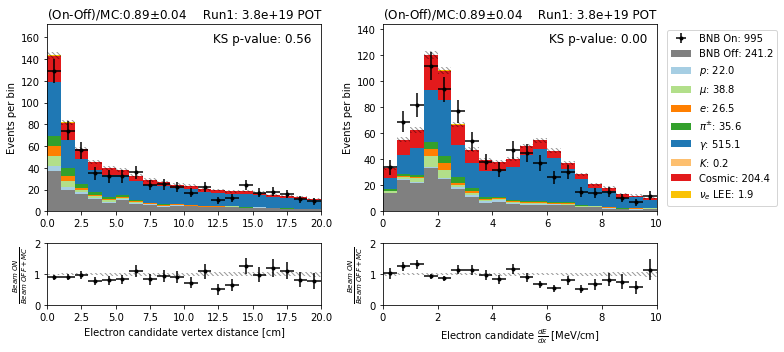

<IPython.core.display.Javascript object>

In [24]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_dist_v",
    "Electron candidate vertex distance [cm]",
    N_bins=20,
    x_min=0,
    x_max=20,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_dedx_y_v",
    r"Electron candidate $\frac{dE}{dx}$ [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=10,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_shwrfields.pdf", bbox_inches="tight")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


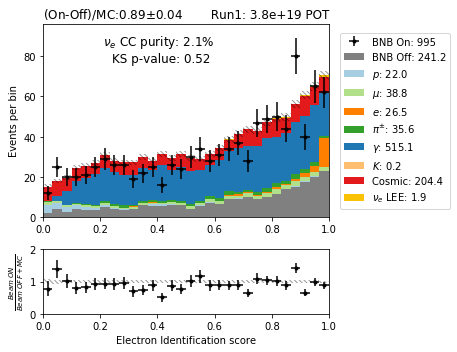

<IPython.core.display.Javascript object>

In [25]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "score",
    "Electron Identification score",
    N_bins=30,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.6,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_e_score.pdf", bbox_inches="tight")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs
MC category: $p$: 587.8 	#entries 40421
MC category: $\mu$: 542.7 	#entries 9833
MC category: $e$: 20.9 	#entries 21137
MC category: $\pi^{\pm}$: 184.5 	#entries 12346
MC category: $\gamma$: 575.7 	#entries 20497
MC category: $K$: 3.3 	#entries 166
MC category: Cosmic: 694.1 	#entries 32981


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


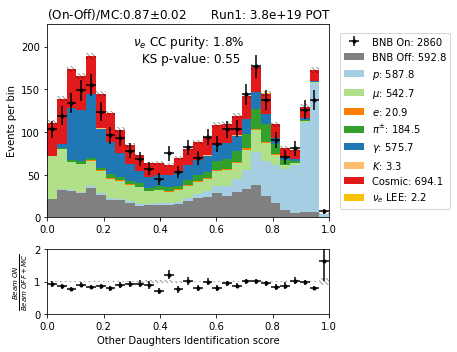

<IPython.core.display.Javascript object>

In [26]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "score",
    "Other Daughters Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.7,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_score.pdf", bbox_inches="tight")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
MC category: $\nu_e$ CC other: 9.7 	#entries 13579
MC category: $\nu_e$ CC 0$\pi$0p: 2.4 	#entries 3239
MC category: $\nu_e$ CC 0$\pi$Np: 10.7 	#entries 15002
MC category: $\nu_{\mu}$ CC other: 149.1 	#entries 2701
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 330.9 	#entries 6014
MC category: $\nu$ NC: 20.5 	#entries 372
MC category: $\nu$ NC $\pi^{0}$: 128.0 	#entries 2326
MC category: Cosmic: 78.3 	#entries 2517
MC category: Out of FV: 97.0 	#entries 3812
MC category: Out of Cryo: 16.0 	#entries 133


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


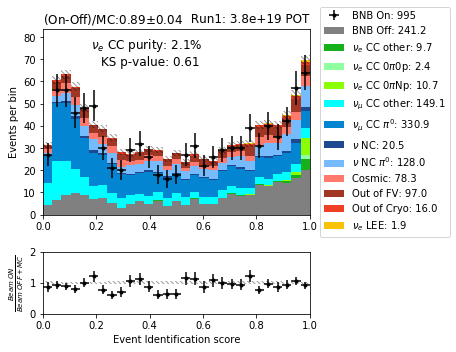

<IPython.core.display.Javascript object>

In [27]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(4 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "score_event",
    "Event Identification score",
    N_bins=29,
    x_min=0,
    x_max=1,
    query="e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.6,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_event_score.pdf", bbox_inches="tight")

MC category: $\nu_e$ CC other: 3.3 	#entries 4664
MC category: $\nu_e$ CC 0$\pi$0p: 1.2 	#entries 1677
MC category: $\nu_e$ CC 0$\pi$Np: 6.4 	#entries 9090
MC category: $\nu_{\mu}$ CC other: 1.2 	#entries 21
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 2.3 	#entries 41
MC category: $\nu$ NC: 0.7 	#entries 13
MC category: $\nu$ NC $\pi^{0}$: 2.6 	#entries 47
MC category: Cosmic: 1.5 	#entries 119
MC category: Out of FV: 1.7 	#entries 219
MC category: Out of Cryo: 0.6 	#entries 5


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $\nu_e$ CC other: 3.3 	#entries 4664
MC category: $\nu_e$ CC 0$\pi$0p: 1.2 	#entries 1677
MC category: $\nu_e$ CC 0$\pi$Np: 6.4 	#entries 9090
MC category: $\nu_{\mu}$ CC other: 1.2 	#entries 21
MC category: $\nu_{\mu}$ CC $\pi^{0}$: 2.3 	#entries 41
MC category: $\nu$ NC: 0.7 	#entries 13
MC category: $\nu$ NC $\pi^{0}$: 2.6 	#entries 47
MC category: Cosmic: 1.5 	#entries 119
MC category: Out of FV: 1.7 	#entries 219
MC category: Out of Cryo: 0.6 	#entries 5


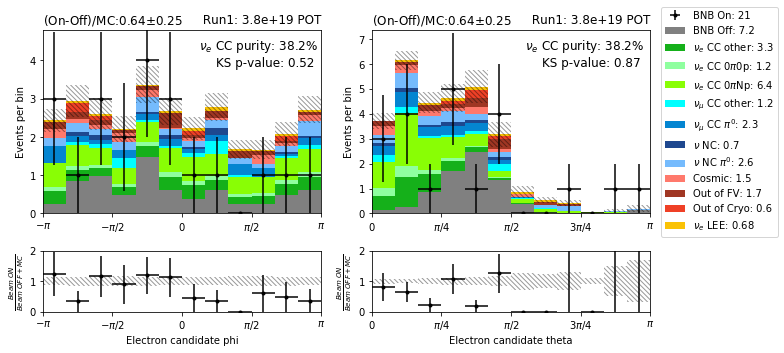

<IPython.core.display.Javascript object>

In [28]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_tkfit_phi_v",
    "Electron candidate phi",
    N_bins=12,
    x_min=-np.pi,
    x_max=np.pi,
    legend=False,
    query=q_s,
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)
x_ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
x_labels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
ax[1][0].set_xticks(x_ticks)
ax[1][0].set_xticklabels(x_labels)
ax[0][0].set_xticks(x_ticks)
ax[0][0].set_xticklabels(x_labels)

ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_theta_v",
    "Electron candidate theta",
    N_bins=12,
    x_min=0,
    x_max=np.pi,
    legend=True,
    query=q_s,
    title_str=title_str.split("NE")[-1],
    kind="cat",
    y_max_scaler=1.2,
)
x_ticks = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi]
x_labels = [r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"]
ax[1][1].set_xticks(x_ticks)
ax[1][1].set_xticklabels(x_labels)
ax[0][1].set_xticks(x_ticks)
ax[0][1].set_xticklabels(x_labels)

ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/after_angles.pdf", bbox_inches="tight")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
MC category: $p$: 587.8 	#entries 40421
MC category: $\mu$: 542.7 	#entries 9833
MC category: $e$: 20.9 	#entries 21137
MC category: $\pi^{\pm}$: 184.5 	#entries 12346
MC category: $\gamma$: 575.7 	#entries 20497
MC category: $K$: 3.3 	#entries 166
MC category: Cosmic: 694.1 	#entries 32981


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


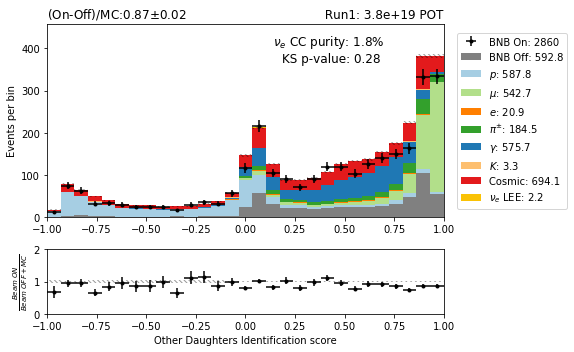

<IPython.core.display.Javascript object>

In [29]:
%time
fig, ax = plt.subplots(
    ncols=1, nrows=2, figsize=(5 * plotter.gr, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax,
    "trk_llr_pid_score_v",
    "Other Daughters Identification score",
    N_bins=29,
    x_min=-1,
    x_max=1,
    query="~e_candidate>0 & preselect",
    legend=True,
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0].text(
    ax[0].get_xlim()[1] * 0.7,
    ax[0].get_ylim()[1] * 0.8,
    r"$\nu_e$"
    + " CC purity: {0:<3.1f}%\nKS p-value: {1:<5.2f}".format(purity * 100, ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_daughter_nico_zoom.pdf", bbox_inches="tight")

MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


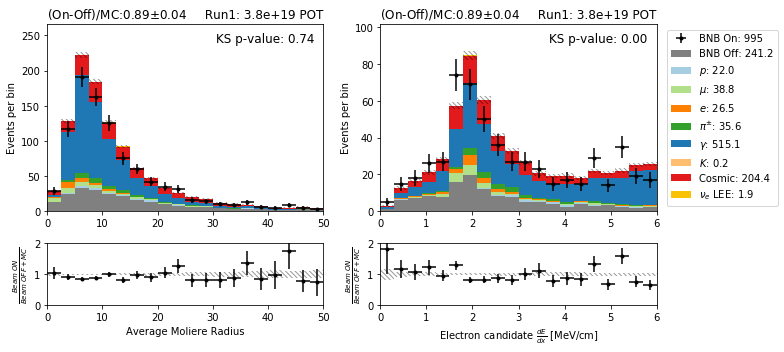

<IPython.core.display.Javascript object>

In [30]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "shr_moliere_avg_v",
    "Average Moliere Radius",
    N_bins=20,
    x_min=0,
    x_max=50,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_tkfit_gap10_dedx_y_v",
    r"Electron candidate $\frac{dE}{dx}$ [MeV/cm]",
    N_bins=20,
    x_min=0,
    x_max=6,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_moliere.pdf", bbox_inches="tight")

MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:477: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data, side="right")]]
/home/wouter/Documents/Jupyter/searchingfornues/helpers/plot_class.py:478: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data, side="right")]]


MC category: $p$: 22.0 	#entries 545
MC category: $\mu$: 38.8 	#entries 671
MC category: $e$: 26.5 	#entries 31327
MC category: $\pi^{\pm}$: 35.6 	#entries 824
MC category: $\gamma$: 515.1 	#entries 11803
MC category: $K$: 0.2 	#entries 6
MC category: Cosmic: 204.4 	#entries 4519


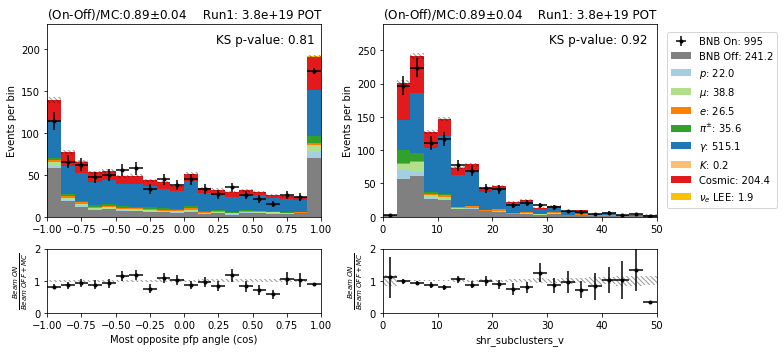

<IPython.core.display.Javascript object>

In [31]:
fig, ax = plt.subplots(
    ncols=2, nrows=2, figsize=(11, 5), gridspec_kw={"height_ratios": [3, 1]}
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_min_cos",
    "Most opposite pfp angle (cos)",
    N_bins=20,
    x_min=-1,
    x_max=1,
    legend=False,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][0].text(
    ax[0][0].get_xlim()[1] * 0.98,
    ax[0][0].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

ratio, purity, ks_p, bin_dict = plotter.plot_panel_data_mc(
    ax.T[1],
    "shr_subclusters_v",
    r"shr_subclusters_v",
    N_bins=20,
    x_min=0,
    x_max=50,
    legend=True,
    query="e_candidate>0 & preselect",
    title_str=title_str.split("NE")[-1],
    kind="pdg",
    y_max_scaler=1.2,
)
ax[0][1].text(
    ax[0][1].get_xlim()[1] * 0.98,
    ax[0][1].get_ylim()[1] * 0.9,
    "KS p-value: {0:<5.2f}".format(ks_p),
    horizontalalignment="right",
    fontsize=12,
)

fig.tight_layout()
fig.savefig(output_dir + "data_mc/pre_clustershwr.pdf", bbox_inches="tight")